#📌 Extracción

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Ruta al archivo en Drive (ajusta la ruta a tu carpeta)
path = "/content/drive/MyDrive/TelecomX_Data.json"

# Leer JSON
df = pd.read_json(path)
df.head()


Mounted at /content/drive


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [5]:
# Vista general: tipos de datos, nulos, memoria
df.info()

# Vista estadística (incluye categorías y numéricos)
df.describe(include="all").T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,count,unique,top,freq
customerID,7267,7267,9995-HOTOH,1
Churn,7267,3,No,5174
customer,7267,891,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...",223
phone,7267,3,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}",3495
internet,7267,129,"{'InternetService': 'No', 'OnlineSecurity': 'N...",1581
account,7267,6931,"{'Contract': 'Month-to-month', 'PaperlessBilli...",6


In [6]:
 #Conteo de nulos por columna
print(df.isnull().sum())

# Porcentaje de nulos por columna
print((df.isnull().mean() * 100).round(2))

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [10]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [12]:
#Para expandir esas estructuras en nuevas columnas.
import pandas as pd

# Expandir subcampos de cada columna anidada
customer_df = pd.json_normalize(df["customer"])
phone_df    = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df  = pd.json_normalize(df["account"])

# Concatenar todo en un solo DataFrame
df_clean = pd.concat([df["customerID"], df["Churn"],
                      customer_df, phone_df, internet_df, account_df], axis=1)

# Revisar resultado
print(df_clean.info())
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [15]:
#columna Churn ya no es de tipo string (posiblemente ya tiene valores NaN, números o algún booleano mezclado).
df_clean["Churn"] = (
    df_clean["Churn"]
    .astype(str)                # forzar a string
    .str.strip()                # quitar espacios
    .str.lower()                # pasar a minúsculas
    .replace({"yes": 1, "no": 0, "nan": pd.NA})  # mapear a 1/0
)


In [16]:
print(df_clean["Churn"].unique())
print(df_clean["Churn"].value_counts(dropna=False))


['0' '1' '<na>']
Churn
0       5174
1       1869
<na>     224
Name: count, dtype: int64


In [17]:
import numpy as np

# Reemplazar string '<na>' por NaN real y convertir a int
df_clean["Churn"] = df_clean["Churn"].replace("<na>", np.nan).astype("float")

In [18]:
#Columna binaria numérica lista para análisis y modelado.
print(df_clean["Churn"].unique())
print(df_clean["Churn"].value_counts(dropna=False))
print(df_clean["Churn"].dtype)

[ 0.  1. nan]
Churn
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64
float64


#📊 Carga y análisis

In [19]:
import pandas as pd

# Resumen estadístico de todas las variables numéricas
desc = df_clean.describe().T

# Agregar métricas adicionales
desc["varianza"] = df_clean.var(numeric_only=True)
desc["mediana"] = df_clean.median(numeric_only=True)

# Mostrar las primeras filas
desc

,count,mean,std,min,25%,50%,75%,max,varianza,mediana
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.0,1.000,1.00,0.194976,0.0
SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00,0.136216,0.0
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00,603.772023,29.0
Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75,907.791102,70.3


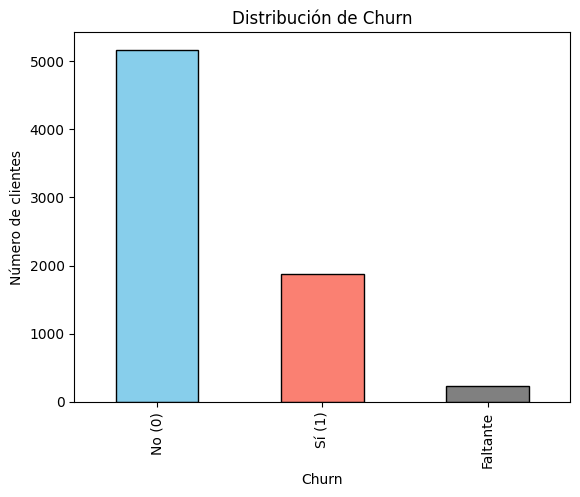

In [20]:
import matplotlib.pyplot as plt

# Conteo de churn (0 = se quedó, 1 = se fue, NaN = faltante)
churn_counts = df_clean["Churn"].value_counts(dropna=False)

# Gráfico de barras
churn_counts.plot(kind="bar", color=["skyblue", "salmon", "gray"], edgecolor="black")
plt.title("Distribución de Churn")
plt.xticks([0,1,2], ["No (0)", "Sí (1)", "Faltante"])
plt.ylabel("Número de clientes")
plt.show()

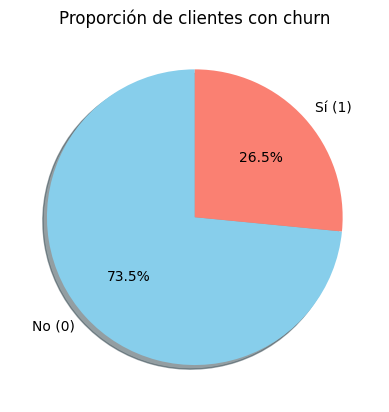

In [21]:
# Pie chart (excluyendo nulos si no quieres mostrarlos)
df_clean["Churn"].dropna().value_counts().plot(
    kind="pie",
    labels=["No (0)", "Sí (1)"],
    autopct="%1.1f%%",
    colors=["skyblue", "salmon"],
    startangle=90,
    shadow=True
)
plt.title("Proporción de clientes con churn")
plt.ylabel("")
plt.show()

In [31]:
import pandas as pd

# Expandir cada campo anidado
customer_df = pd.json_normalize(df["customer"])
phone_df    = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df  = pd.json_normalize(df["account"])

# Unir todo en un solo DataFrame
df_flat = pd.concat([df[["customerID", "Churn"]],
                     customer_df, phone_df, internet_df, account_df], axis=1)

# Revisar las columnas finales
print(df_flat.columns.tolist())


['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


In [35]:
print(df["Churn"].unique())
print(df["Churn"].dtype)

[ 0.  1. nan]
float64


In [36]:
print(df["Churn"].value_counts(dropna=False))
print(df["Churn"].value_counts(normalize=True, dropna=False) * 100)

Churn
0.0    5174
1.0    1869
NaN     224
Name: count, dtype: int64
Churn
0.0    71.198569
1.0    25.719004
NaN     3.082427
Name: proportion, dtype: float64


In [39]:
for col in df.columns:
    print(col, df[col].dtype)
    print(df[col].head(3).tolist(), "\n")

customerID object
['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ'] 

Churn float64
[0.0, 0.0, 1.0] 

customer object
[{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}, {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}, {'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}] 

phone object
[{'PhoneService': 'Yes', 'MultipleLines': 'No'}, {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}, {'PhoneService': 'Yes', 'MultipleLines': 'No'}] 

internet object
[{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'Yes', 'DeviceProtection': 'No', 'TechSupport': 'Yes', 'StreamingTV': 'Yes', 'StreamingMovies': 'No'}, {'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}, {'InternetService': 'Fiber optic', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtecti

In [41]:
# Expandir los diccionarios
customer_df = pd.json_normalize(df["customer"])
phone_df    = pd.json_normalize(df["phone"])
internet_df = pd.json_normalize(df["internet"])
account_df  = pd.json_normalize(df["account"])

# Extraer las subclaves dentro de Charges
charges_df  = pd.json_normalize(df["account"].apply(lambda x: x.get("Charges", {})))

# Si Charges ya se expandió en account_df, quitamos esas columnas duplicadas
cols_to_keep = [c for c in account_df.columns if not c.startswith("Charges")]

# Unir todo en un DataFrame plano
df_flat = pd.concat(
    [df[["customerID", "Churn"]],
     customer_df,
     phone_df,
     internet_df,
     account_df[cols_to_keep],  # usamos solo columnas de account sin Charges
     charges_df],
    axis=1
)

# Renombrar columnas para mayor claridad
df_flat = df_flat.rename(columns={"Monthly": "Charges.Monthly", "Total": "Charges.Total"})

# Revisar columnas resultantes
print(df_flat.columns.tolist()[:20])




['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly']


In [42]:
# Convertir Churn a numérico
df_flat["Churn"] = df_flat["Churn"].astype(float)

# Limpiar Charges.Total
df_flat["Charges.Total"] = pd.to_numeric(df_flat["Charges.Total"], errors="coerce")

# Revisar valores únicos de algunas categóricas
for col in ["gender", "Contract", "PaymentMethod"]:
    print(col, "->", df_flat[col].unique()[:10])

gender -> ['Female' 'Male']
Contract -> ['One year' 'Month-to-month' 'Two year']
PaymentMethod -> ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']



===== Churn vs gender =====
Churn     0.0    1.0
gender              
Female  73.08  26.92
Male    73.84  26.16


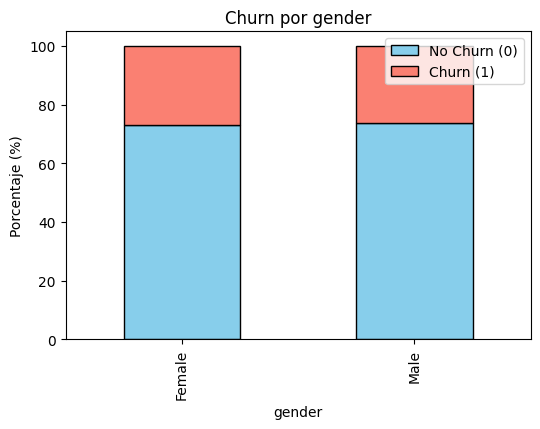


===== Churn vs Partner =====
Churn      0.0    1.0
Partner              
No       67.04  32.96
Yes      80.34  19.66


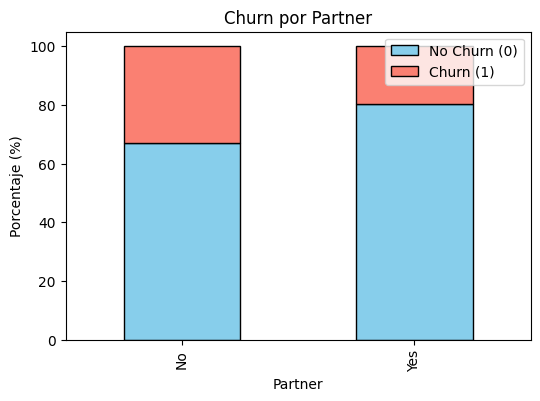


===== Churn vs Dependents =====
Churn         0.0    1.0
Dependents              
No          68.72  31.28
Yes         84.55  15.45


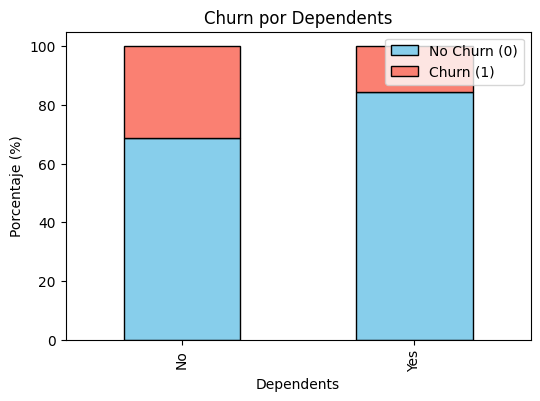


===== Churn vs PhoneService =====
Churn           0.0    1.0
PhoneService              
No            75.07  24.93
Yes           73.29  26.71


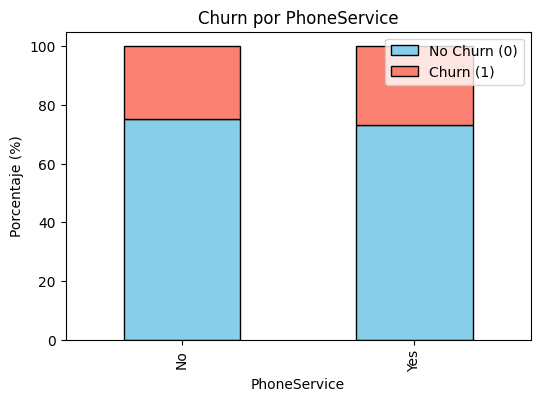


===== Churn vs MultipleLines =====
Churn               0.0    1.0
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61


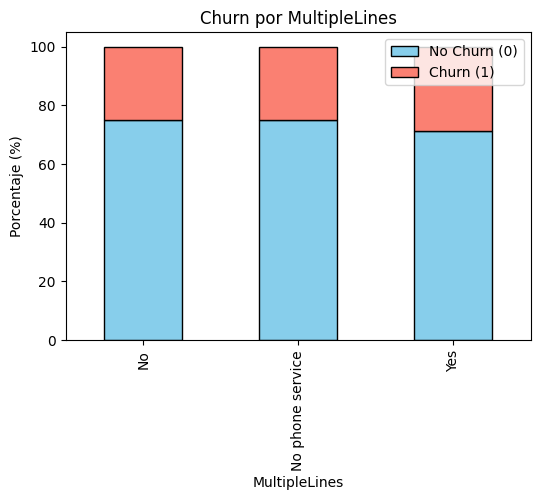


===== Churn vs InternetService =====
Churn              0.0    1.0
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40


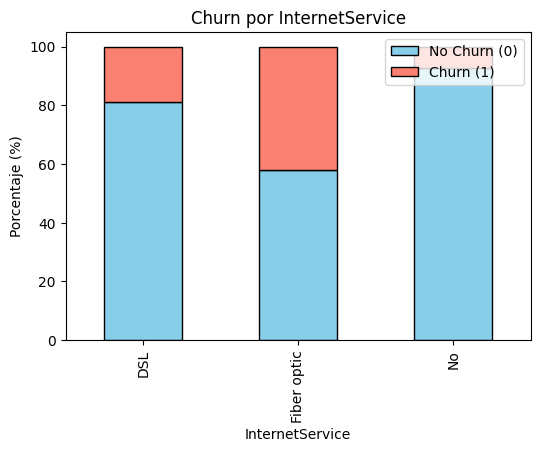


===== Churn vs OnlineSecurity =====
Churn                  0.0    1.0
OnlineSecurity                   
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61


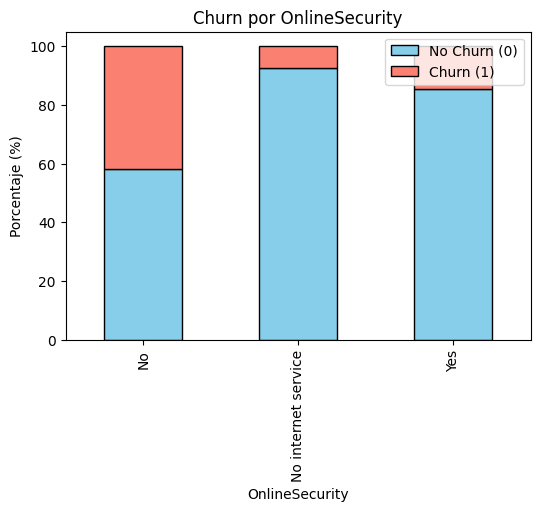


===== Churn vs OnlineBackup =====
Churn                  0.0    1.0
OnlineBackup                     
No                   60.07  39.93
No internet service  92.60   7.40
Yes                  78.47  21.53


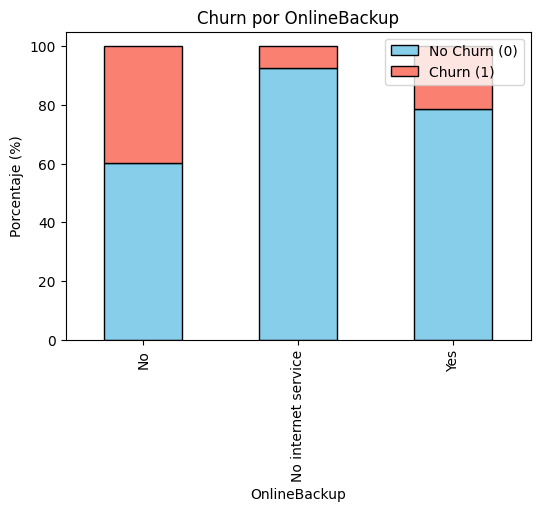


===== Churn vs DeviceProtection =====
Churn                  0.0    1.0
DeviceProtection                 
No                   60.87  39.13
No internet service  92.60   7.40
Yes                  77.50  22.50


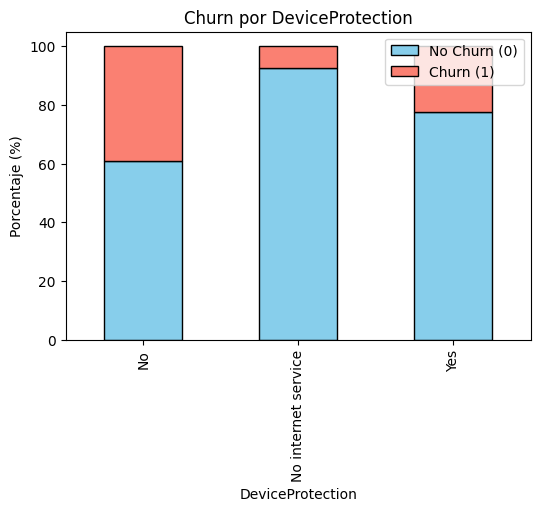


===== Churn vs TechSupport =====
Churn                  0.0    1.0
TechSupport                      
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  15.17


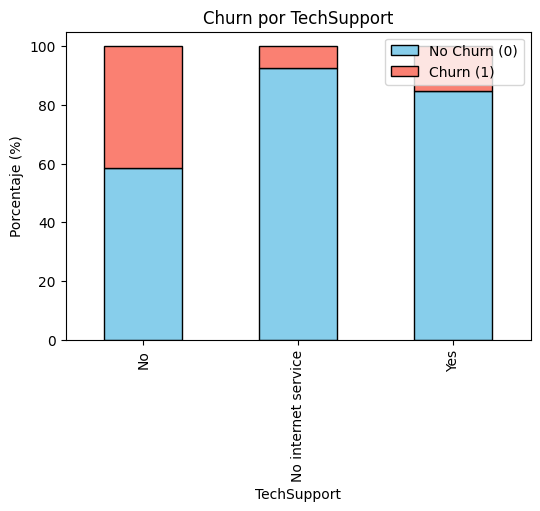


===== Churn vs StreamingTV =====
Churn                  0.0    1.0
StreamingTV                      
No                   66.48  33.52
No internet service  92.60   7.40
Yes                  69.93  30.07


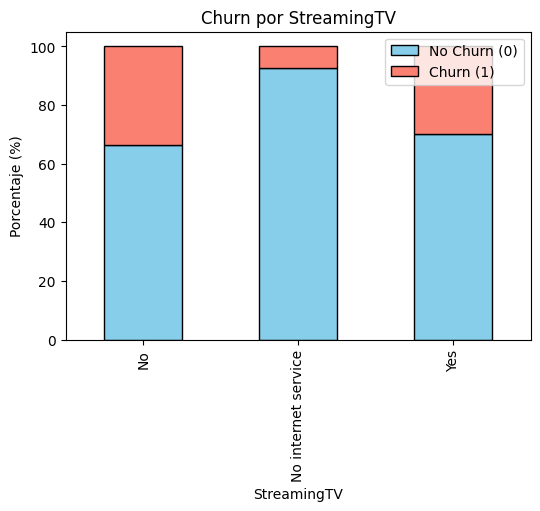


===== Churn vs StreamingMovies =====
Churn                  0.0    1.0
StreamingMovies                  
No                   66.32  33.68
No internet service  92.60   7.40
Yes                  70.06  29.94


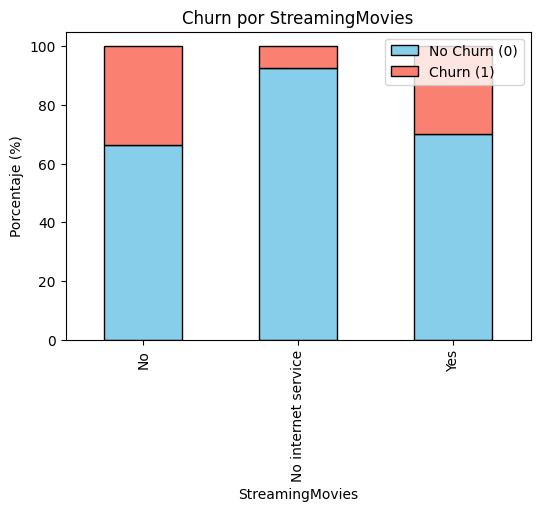


===== Churn vs Contract =====
Churn             0.0    1.0
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


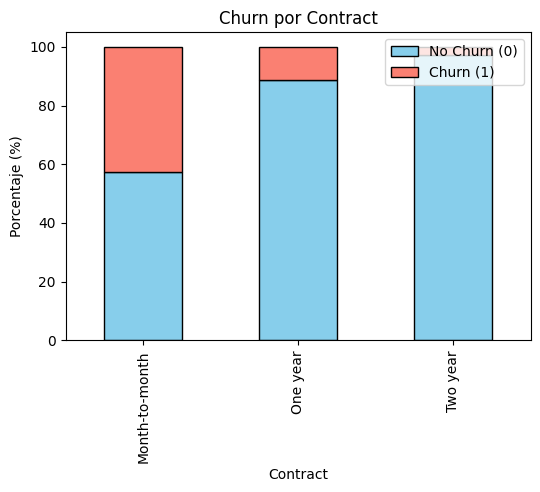


===== Churn vs PaperlessBilling =====
Churn               0.0    1.0
PaperlessBilling              
No                83.67  16.33
Yes               66.43  33.57


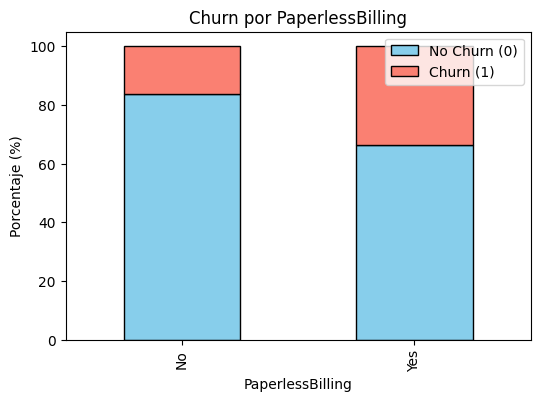


===== Churn vs PaymentMethod =====
Churn                        0.0    1.0
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


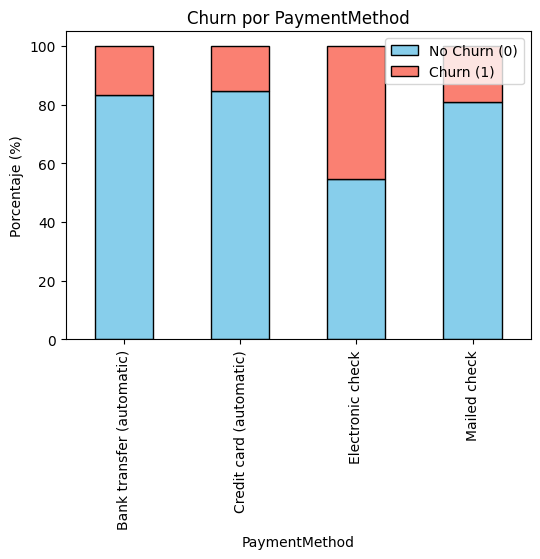

In [43]:
import matplotlib.pyplot as plt

categoricas = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
               "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
               "PaperlessBilling", "PaymentMethod"]

for col in categoricas:
    tabla = pd.crosstab(df_flat[col], df_flat["Churn"], normalize="index") * 100
    print(f"\n===== Churn vs {col} =====")
    print(tabla.round(2))

    tabla.plot(kind="bar", stacked=True, figsize=(6,4),
               color=["skyblue", "salmon"], edgecolor="black")
    plt.title(f"Churn por {col}")
    plt.ylabel("Porcentaje (%)")
    plt.legend(["No Churn (0)", "Churn (1)"], loc="upper right")
    plt.show()


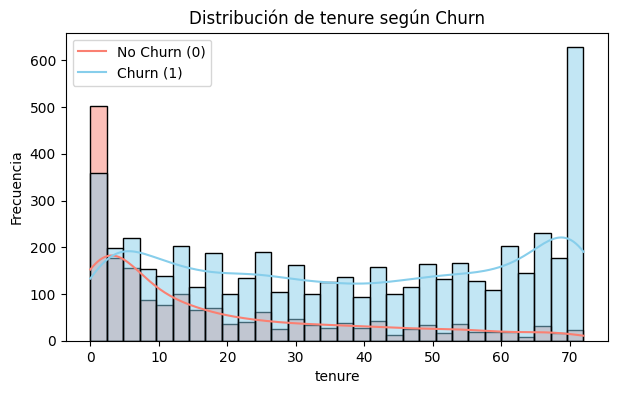

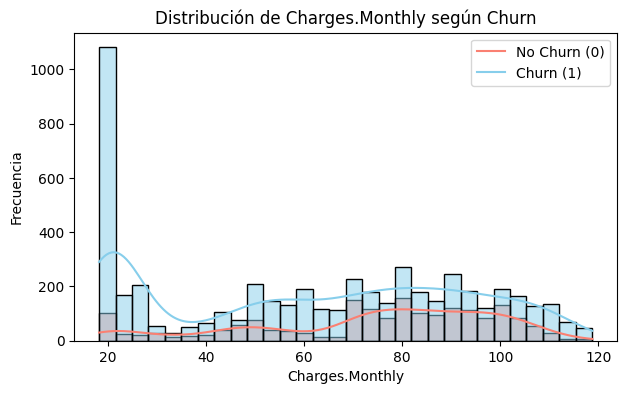

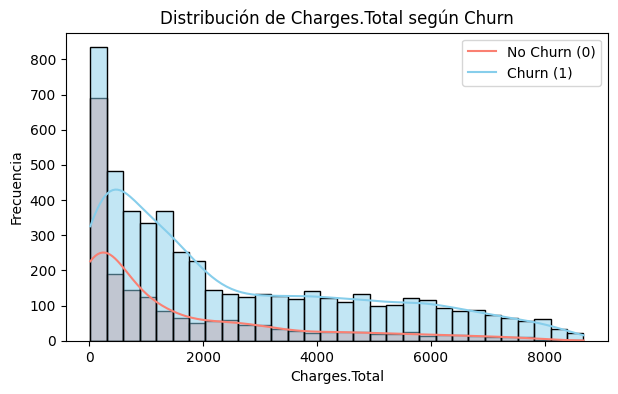

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = ["tenure", "Charges.Monthly", "Charges.Total"]

for col in numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df_flat, x=col, hue="Churn", kde=True, bins=30, palette=["skyblue","salmon"])
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend(["No Churn (0)", "Churn (1)"])
    plt.show()


#📄Informe final

In [47]:
from IPython.display import Markdown, display

informe = r"""
# Informe Final — Análisis de Evasión de Clientes (Churn) en Telecom X
[1) Introducción

El propósito de este análisis fue comprender los factores que influyen en la evasión de clientes (Churn) en Telecom X. A partir de datos históricos de clientes, servicios contratados y facturación, se realizó un Análisis Exploratorio (EDA) para detectar patrones de cancelación. Los hallazgos buscan orientar estrategias de retención y gestión comercial.

Alcance:

Datos extraídos de JSON y transformados en un DataFrame tabular.

Variables analizadas: datos demográficos, servicios (Internet, seguridad, soporte), tipo de contrato, método de pago y métricas financieras (tenure, Charges.Monthly, Charges.Total).]
Variable objetivo: Churn (1 = canceló, 0 = permaneció)."""

display(Markdown(informe))



# Informe Final — Análisis de Evasión de Clientes (Churn) en Telecom X
[1) Introducción

El propósito de este análisis fue comprender los factores que influyen en la evasión de clientes (Churn) en Telecom X. A partir de datos históricos de clientes, servicios contratados y facturación, se realizó un Análisis Exploratorio (EDA) para detectar patrones de cancelación. Los hallazgos buscan orientar estrategias de retención y gestión comercial.

Alcance:

Datos extraídos de JSON y transformados en un DataFrame tabular.

Variables analizadas: datos demográficos, servicios (Internet, seguridad, soporte), tipo de contrato, método de pago y métricas financieras (tenure, Charges.Monthly, Charges.Total).]
Variable objetivo: Churn (1 = canceló, 0 = permaneció).

In [48]:
from IPython.display import Markdown, display

informe = r"""
# 2) Limpieza y Preparación de Datos

Aplanado de estructuras anidadas (customer, phone, internet, account) con pd.json_normalize.

Normalización de Churn → valores binarios (0/1).

Conversión de tipos → Charges.Total a numérico, con control de nulos.

Validaciones: revisión de valores ausentes, duplicados y consistencia en categorías (Yes/No, contratos, métodos de pago).

✅ Resultado: datos completos y listos para el análisis."""

display(Markdown(informe))


# 2) Limpieza y Preparación de Datos

Aplanado de estructuras anidadas (customer, phone, internet, account) con pd.json_normalize.

Normalización de Churn → valores binarios (0/1).

Conversión de tipos → Charges.Total a numérico, con control de nulos.

Validaciones: revisión de valores ausentes, duplicados y consistencia en categorías (Yes/No, contratos, métodos de pago).

✅ Resultado: datos completos y listos para el análisis.

In [50]:
from IPython.display import Markdown, display

informe = r"""
#3) Exploración de Datos

3.1 Distribución General

Churn ≈ 25–26% de clientes.

Permanecen ≈ 71%, NaN ≈ 3%.
🔎 1 de cada 4 clientes cancela, lo que confirma la relevancia del problema.

3.2 Variables Categóricas

Contrato: clientes Month-to-month muestran mayor tasa de churn frente a contratos de 1–2 años.

Método de pago: Electronic check registra más cancelaciones frente a pagos automáticos.

Servicios adicionales: ausencia de OnlineSecurity o TechSupport se asocia a mayor evasión.

3.3 Variables Numéricas

Tenure: clientes con menor antigüedad son más propensos a cancelar.

Charges.Monthly: mayor churn en clientes con tarifas altas → sensibilidad a precio.

Charges.Total: quienes cancelan tienen menor gasto acumulado, coherente con menor tiempo de permanencia."""

display(Markdown(informe))


#3) Exploración de Datos

3.1 Distribución General

Churn ≈ 25–26% de clientes.

Permanecen ≈ 71%, NaN ≈ 3%.
🔎 1 de cada 4 clientes cancela, lo que confirma la relevancia del problema.

3.2 Variables Categóricas

Contrato: clientes Month-to-month muestran mayor tasa de churn frente a contratos de 1–2 años.

Método de pago: Electronic check registra más cancelaciones frente a pagos automáticos.

Servicios adicionales: ausencia de OnlineSecurity o TechSupport se asocia a mayor evasión.

3.3 Variables Numéricas

Tenure: clientes con menor antigüedad son más propensos a cancelar.

Charges.Monthly: mayor churn en clientes con tarifas altas → sensibilidad a precio.

Charges.Total: quienes cancelan tienen menor gasto acumulado, coherente con menor tiempo de permanencia.

In [51]:
from IPython.display import Markdown, display

informe = r"""
#Recomendaciones

Desarrollar un sistema de predicción de churn que permita anticipar cancelaciones y enfocar recursos en clientes de mayor riesgo.

Implementar una segmentación avanzada que clasifique a los clientes según su sensibilidad al precio, tipo de servicio contratado y nivel de engagement.

Establecer un tablero de control de KPIs que mida de forma continua la tasa de churn por segmentos clave (contrato, método de pago, servicios adicionales).."""

display(Markdown(informe))


#Recomendaciones

Desarrollar un sistema de predicción de churn que permita anticipar cancelaciones y enfocar recursos en clientes de mayor riesgo.

Implementar una segmentación avanzada que clasifique a los clientes según su sensibilidad al precio, tipo de servicio contratado y nivel de engagement.

Establecer un tablero de control de KPIs que mida de forma continua la tasa de churn por segmentos clave (contrato, método de pago, servicios adicionales)..